In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

from utils import *

In [2]:
train_data, test_data = load_mnist()

In [3]:
missingness = Missingness()
imputer = KNNImageImputer()

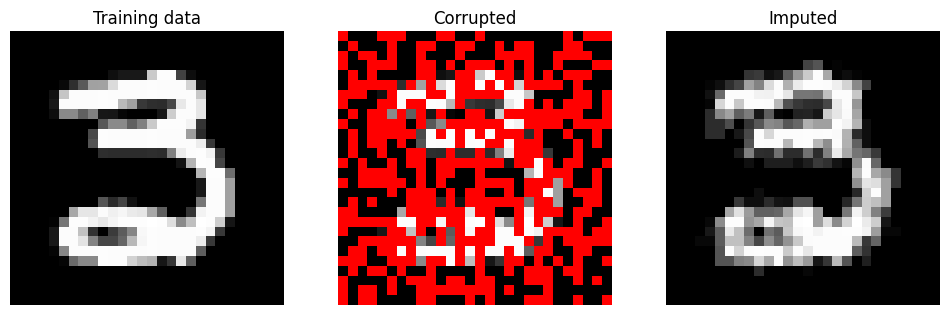

In [4]:
idx = torch.randint(len(train_data), size=(1,)).item()

img, label = train_data[idx]
corrupted, mask = missingness.mcar(img, missing_rate=0.5)
imputed = imputer.impute(corrupted)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

cmap = plt.cm.grey.copy()
cmap.set_bad('red')

ax[0].imshow(img.squeeze(), cmap=cmap)
ax[0].set_title("Training data")
ax[0].axis('off')

ax[1].imshow(corrupted.squeeze(), cmap=cmap)
ax[1].set_title("Corrupted")
ax[1].axis('off')

ax[2].imshow(imputed.squeeze(), cmap=cmap)
ax[2].set_title("Imputed")
ax[2].axis('off')

plt.show()

In [5]:
missingness = Missingness()
knn_imputer = KNNImageImputer(k=5)
mean_imputer = MeanImageImputer()

device = get_device()

missingness_percentages = np.arange(0, 100, 5)

In [6]:
tensor_x, labels, indices = get_raw_data('mnist', device=device)

In [7]:
ari_scores_dae = []
nmi_scores_dae = []


corruption_kwargs = {
    'corruption_type': "mcar",
    "missing_rate": 0.75,
}
missingness_percentages = np.arange(0, 30, 10)

In [8]:
for mcar_percent in missingness_percentages:
    missing_rate_float = mcar_percent / 100.0

    ari, nmi = run_dec_pipeline(
        X_clean=tensor_x,
        y_true=labels,
        data_indices=indices,
        missingness=missingness,
        imputer=None,
        device=device,
        ae_epochs=10,
        dec_epochs=25,
        **corruption_kwargs,
    )

    ari_scores_dae.append(ari)
    nmi_scores_dae.append(nmi)

	No corruption applied
	- Training Autoencoder
Epoch 5/10: average loss = 0.0288
Epoch 10/10: average loss = 0.0234
	- Training DEC
Epoch 10/25: average loss = 0.1340
Epoch 20/25: average loss = 0.1023
Epoch 25/25: average loss = 0.0939
	Evaluation
Result: ARI=0.5835 | NMI=0.6763
	No corruption applied
	- Training Autoencoder
Epoch 5/10: average loss = 0.0282
Epoch 10/10: average loss = 0.0233
	- Training DEC
Epoch 10/25: average loss = 0.1201
Epoch 20/25: average loss = 0.0925
Epoch 25/25: average loss = 0.0845
	Evaluation
Result: ARI=0.6999 | NMI=0.7860
	No corruption applied
	- Training Autoencoder
Epoch 5/10: average loss = 0.0279
Epoch 10/10: average loss = 0.0235
	- Training DEC
Epoch 10/25: average loss = 0.1390
Epoch 20/25: average loss = 0.1065
Epoch 25/25: average loss = 0.0972
	Evaluation
Result: ARI=0.6421 | NMI=0.7178


In [9]:
results_df = pd.DataFrame({
    'Missingness': missingness_percentages,
    'ARI': ari_scores_dae,
    'NMI': nmi_scores_dae,
})

print(results_df)

   Missingness       ARI       NMI
0            0  0.583537  0.676338
1           10  0.699926  0.785961
2           20  0.642059  0.717766


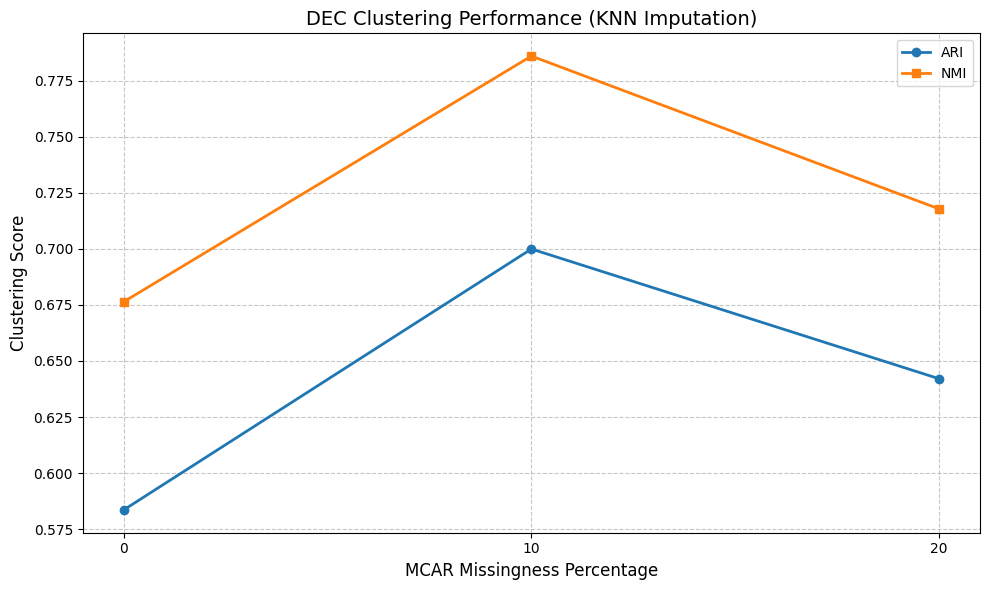

In [10]:
plot_dec_performance(
    missingness_percentages=missingness_percentages,
    score_arrays=[ari_scores_dae, nmi_scores_dae],
    labels=['ARI', 'NMI'],
    title='DEC Clustering Performance (KNN Imputation)'
)